<a href="https://colab.research.google.com/github/hahajjjun/Scientific-Visualization-Python-Matplotlib/blob/main/2_Coordinate_Systems.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 2.1 Coordinate Systems

## 2.1.1 Figure and Data Coordinates

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

(-1.0, 1.0)

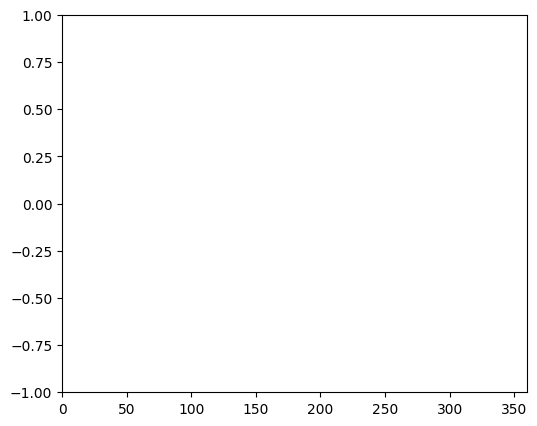

In [5]:
fig = plt.figure(figsize = (6,5), dpi = 100) # actual pixel size of figure is (600,500)
ax = fig.add_subplot(1,1,1)
ax.set_xlim(0,360)
ax.set_ylim(-1,1)

Terminology

*   FC : Figure Coordinates (pixel 단위)
*   NFC : Normalized Figure Coordinates (0-1)
*   DC : Data Coordinates (data unit 단위)
*   NDC : Normalized Data Coordinates (0-1)



In [6]:
DC2FC = ax.transData.transform # Data Coordinate to Figure Coordinate
FC2DC = ax.transData.inverted().transform

NDC2FC = ax.transAxes.transform # Normalized Data Coordinated
FC2NDC = ax.transAxes.inverted().transform

NFC2FC = fig.transFigure.transform
FC2NFC = fig.transFigure.inverted().transform

print(NFC2FC([1,1])) # [600,500] : Figure에서 x=1, y=1의 정규화된 위치는 실제로는 오른쪽 상단 끝
print(NDC2FC([1,1])) # [540,440] : 데이터 값 x=360, y=1을 normalize >> x=1, y=1(0-1까지로 정규화)
print(DC2FC([360,1])) # [540,440] : 데이터 값이 x=360, y=1인 곳의 figure pixel 위치 말함

[600. 500.]
[540. 440.]
[540. 440.]


In [7]:
DC2NDC = lambda x: FC2NDC(DC2FC(x))

# Bottom left corner in data coordinates
print(DC2NDC([0, -1])) # (0.0, 0.0)
# Center in data coordinates
print(DC2NDC([180,0])) # (0.5, 0.5)
# Top right corner in data coordinates
print(DC2NDC([360,1])) # (1.0, 1.0)

[0. 0.]
[0.5 0.5]
[1. 1.]


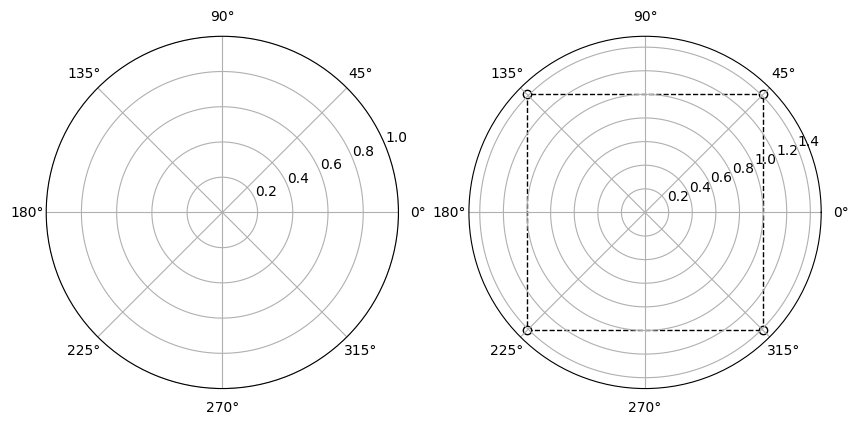

In [28]:
fig = plt.figure(figsize=(10, 5), dpi=100)
ax1 = fig.add_subplot(1, 2, 1, projection='polar')
ax2 = fig.add_subplot(1, 2, 2, projection='polar')
FC2DC = ax1.transData.inverted().transform
NDC2FC = ax1.transAxes.transform
NDC2DC = lambda x: FC2DC(NDC2FC(x))
P = NDC2DC([[0,0], [1,0], [1,1], [0,1], [0,0]])
ax2.plot(P[:,0], P[:,1], clip_on=False, zorder=-10, color="k", linewidth=1.0, linestyle="--")
ax2.scatter(P[:-1,0], P[:-1,1], clip_on=False, facecolor="w", edgecolor="k")
plt.show()
# ax1은 polar coordinate만 그린 경우
# ax2는 polar coordinate 위에 데이터포인트를 그림 : polar coordinate의 좌표(theta, r)로 변환한 결과가 P에 저장됨
# P = [[5pi/4, sqrt(2)] [7pi/4, sqrt(2)], [pi/4, sqrt(2)], [3pi/4, sqrt(2)]]

## 2.1.2 Various Translation and Rotation Examples

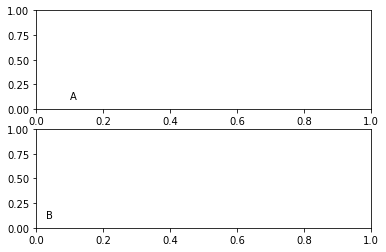

In [36]:
from matplotlib.transforms import ScaledTranslation
fig = plt.figure(figsize=(6, 4))
ax = fig.add_subplot(2, 1, 1)

plt.text(0.1, 0.1, "A", transform=ax.transAxes)
# 전체의 10%씩 translation했다고 보는 것이 적절하다.

ax = fig.add_subplot(2, 1, 2)
# fig.dpi - 72
dx, dy = 10/fig.dpi, 10/fig.dpi
offset = ScaledTranslation(dx, dy, fig.dpi_scale_trans)
plt.text(0, 0, "B", transform=ax.transAxes + offset)
# 가로세로 똑같이 0.1만큼 translation, 이때 세로축이 더 짧으므로 세로축 기준
plt.show()

Rotated Histogram with PCA Axis

In [40]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
from matplotlib.transforms import Affine2D
import mpl_toolkits.axisartist.floating_axes as floating_axes
# Reroducibility seed
np.random.seed(123)

Example of Data Rotation <br/>
[* jehyunlee's blog](https://jehyunlee.github.io/2021/12/02/Python-DS-92-rougier01/)

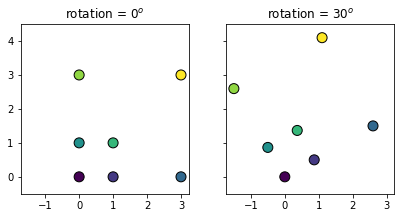

In [62]:
S0 = np.array([[0,0], [1,0], [3,0], [0,1], [1,1], [0,3], [3,3]])
Sc = np.linspace(0, 1, len(S0))
S1 = Affine2D().rotate_deg(30).transform(S0)

fig_s, axs_s = plt.subplots(ncols = 2, figsize = (6,3), sharex=True, sharey=True)

for ax_s, S, txt in zip(axs_s, [S0,S1], [0,30]):
  ax_s.scatter(S[:,0], S[:,1], c=Sc, s=100, ec = "k")

  ax_s.set_aspect(1) # set_aspect(1) : 가로세로 길이 같게 함
  ax_s.set_ylim(-0.5, 4.5)
  ax_s.set_title(f"rotation = {txt}$^o$", fontsize = "large") #LaTeX 문법은 $ 사이에 넣어서, formatting

fig_s.tight_layout()